# Loan Approval Prediction: 
### EDA + Decision Tree, Random Forest & Logistic Regression Modeling

## Introduction
we are going to work on **binary classification problem**,
where we got some information about sample of people , and we need to predict whether we should give some one a loan or not depending on his information .
we actually have a few sample size (614 rows), so we will go with machine learning techniques to solve our problem .

### Problem Statement:

__About Company__ <br>
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

__Problem__ <br>
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

#### Dataset Description:

| Variable | Description | 
|------|------|
| Loan_ID | Unique Loan ID | 
| Gender | Male/ Female | 
| Married | Applicant married (Y/N) | 
| Dependents | Number of dependents | 
| Education | Applicant Education (Graduate/ Under Graduate) | 
| Self_Employed | Self employed (Y/N) | 
| ApplicantIncome | Applicant income | 
| CoapplicantIncome | Coapplicant income | 
| LoanAmount | Loan amount in thousands | 
| Loan_Amount_Term | Term of loan in months | 
| Credit_History | credit history meets guidelines | 
| Property_Area | Urban/ Semi Urban/ Rural | 
| Loan_Status | Loan approved (Y/N) | 


In [1]:
# Importing the Libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
train_df = pd.read_csv("train.csv")
train_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### Observation
1. We can see that the dataframe consists of 13 columns, all of them are self explanatory.
2. there are some missing values and some numerical and categorical columns


In [3]:
# Discription of the numercial data

train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# Description of the categorical data
## But first changing the cridit_history column to object insted of float
train_df["Credit_History"] = train_df["Credit_History"].astype("O")
train_df["Loan_Amount_Term"] = train_df["Loan_Amount_Term"].astype("O")

train_df.describe(include="O")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,600.0,564.0,614,614
unique,614,2,2,4,2,2,10.0,2.0,3,2
top,LP001002,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,Y
freq,1,489,398,345,480,500,512.0,475.0,233,422


In [5]:
# we will drop ID because it's not important for our model and it will just mislead the model

train_df.drop('Loan_ID', axis=1, inplace=True)

In [6]:
# Checking for duplicates
train_df.duplicated().any()

False

In [123]:
# Separate categorical and numerical columns
cat_col = []
num_col = []

for i,j in enumerate(train_df.dtypes):
    if j == object:
        cat_col.append(train_df.dtypes.index[i])
    else :
        num_col.append(train_df.dtypes.index[i])
print("The categorical columns in the data are : ",cat_col)
print("\nThe numercial columns in the data are : ",num_col)

The categorical columns in the data are :  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

The numercial columns in the data are :  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


### Analyze data assigned to columns


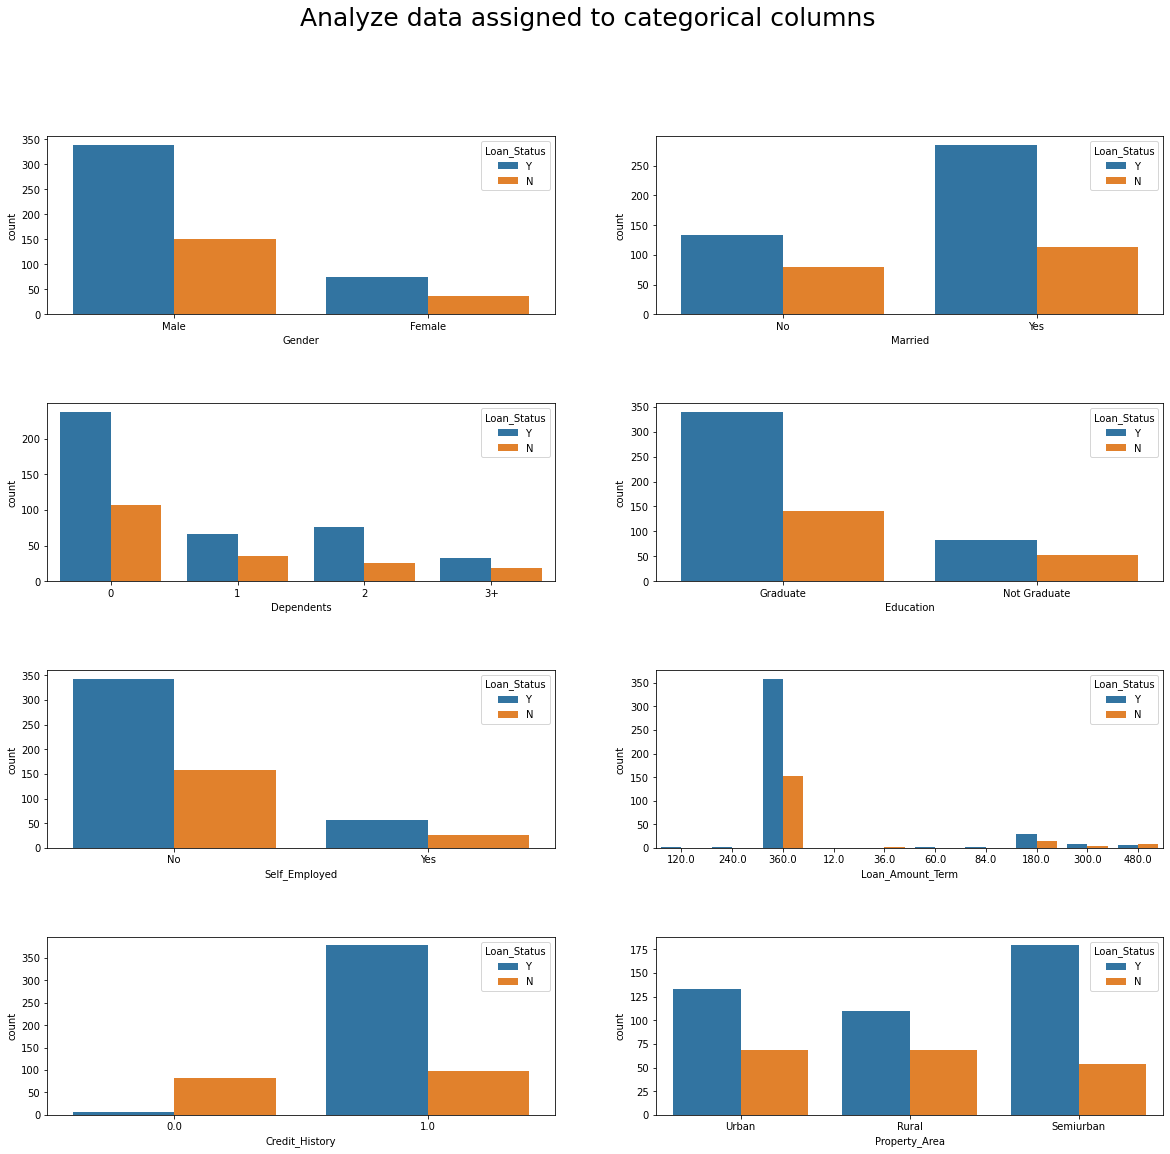

In [115]:
### Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

cat_col.pop()

plt.figure(figsize=(20,18))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Analyze data assigned to categorical columns", fontsize=25)

for n,cat_col in enumerate(cat_col):
    ax = plt.subplot(4,2,n+1)
    sns.countplot(x=cat_col, data=train_df, hue='Loan_Status')

#### Plots above convey following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men  than Women (approx. 3x) 
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.


### Now, let's also analyze Numerical Columns:

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       614.000000         614.000000  592.000000
mean       5403.459283        1621.245798  146.412162
std        6109.041673        2926.248369   85.587325
min         150.000000           0.000000    9.000000
25%        2877.500000           0.000000  100.000000
50%        3812.500000        1188.500000  128.000000
75%        5795.000000        2297.250000  168.000000
max       81000.000000       41667.000000  700.000000


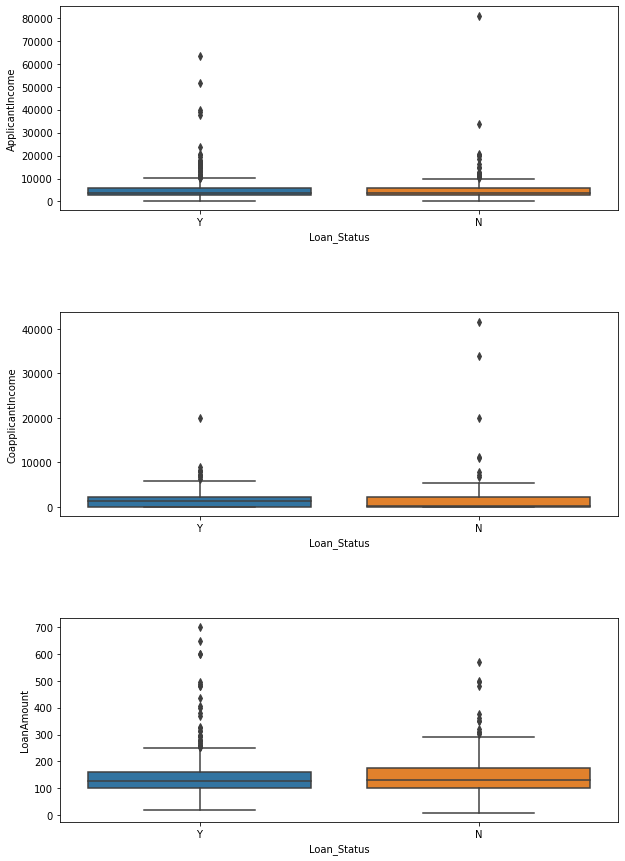

In [122]:
print(train_df[num_col].describe())

plt.figure(figsize=(10,15))

for n, num_col in enumerate(num_col):
    ax = plt.subplot(3,1,n+1)
    sns.boxplot(x='Loan_Status', y=num_col, data=train_df)

plt.subplots_adjust(hspace=0.5)

For Numercical Columns, there is no significant relation to Loan approval status

### Preprocessing Data:
Input data needs to be pre-processed before we feed it to model. Following things need to be taken care:
1. Encoding Categorical Features.
2. Imputing missing values

In [124]:
# Encoding categorical features

train_df_encoded = pd.get_dummies(train_df, drop_first=True)
train_df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1
1,4583,1508.0,128.0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,3000,0.0,66.0,1,1,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,1
3,2583,2358.0,120.0,1,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,1
4,6000,0.0,141.0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,1


In [126]:
# Spliting features and target variable
y = train_df_encoded['Loan_Status_Y']
X = train_df_encoded.drop('Loan_Status_Y',axis=1)

# Spliting the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Imputing missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="mean")
X_train = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)

### Model 1: Decision Tree Classifier


In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score

# Insiantiating the model
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)

# Predicting on the training data
y_pred = tree_clf.predict(X_train)

# Printing the results of the model on the training data
print("The Training dataset accuracy is: ", accuracy_score(y_train,y_pred))
print("The Training dataset F1 score is: ", f1_score(y_train,y_pred))

# Printing the results of the model on the training data
print("The Validation dataset accuracy is: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring="accuracy").mean())
print("The Validation dataset F1 score is: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring="f1_macro").mean())


The Training dataset accuracy is:  1.0
The Training dataset F1 score is:  1.0
The Validation dataset accuracy is:  0.6517212945784374
The Validation dataset F1 score is:  0.604408504820176


*we have overfitting in our models, let us check*

## Learning Curve
Learning curves indicates on model performance of the training set and the validation set.

In [150]:
from sklearn.model_selection import learning_curve
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ",scores.std())
    
def learn_curve(model, X, y):
    """
    
    """
    train_sizes, train_scores, val_scores = learning_curve(model,X,y,cv=4,scoring="accuracy")
    train_scores_mean = train_scores.mean(axis=1)
    val_scores_mean = val_scores.mean(axis=1)
    
    # printing scores 
    print("\n", "-"*5, model, "-"*5)
    print("Training scores: ")
    display_scores(train_scores_mean)
    print("\nValidation scores: ")
    display_scores(val_scores_mean)
    
    # Plot learning curve    
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score")
    plt.title(model)
    plt.xlabel("Training Sizes")
    plt.ylabel("Accuracy")
    plt.legend()


 ----- DecisionTreeClassifier() -----
Training scores: 
Scores:  [1. 1. 1. 1. 1.]
Mean:  1.0
Std:  0.0

Validation scores: 
Scores:  [0.59669466 0.62526656 0.66181861 0.67619619 0.65782021]
Mean:  0.643559242969479
Std:  0.02875017002721595


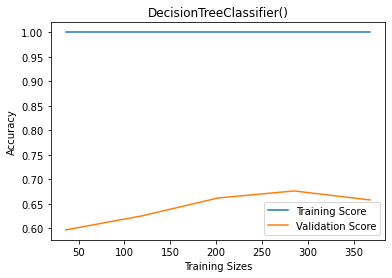

In [151]:
learn_curve(tree_clf, X_train, y_train)

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
     'max_depth' : [3,4, 5, 6, 7, 8],
     'max_features': ['auto' ,'sqrt', 'log2'],
     'min_samples_leaf' : [4,5,6,7,8,35],
     'min_samples_split': [4, 5, 6, 7, 8]
}

grid_tree = GridSearchCV(tree_clf, param_grid_tree, cv=4, scoring='accuracy')
grid_tree.fit(X_train, y_train)

tree_clf_new = grid_tree.best_estimator_


In [144]:
tree_clf_new

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7)

In [147]:
print("The Training dataset accuracy is: ", accuracy_score(y_train,grid_tree.predict(X_train)))
print("The Test dataset accuracy is: ", accuracy_score(y_test,grid_tree.predict(X_test_imp)))


The Training dataset accuracy is:  0.7230142566191446
The Test dataset accuracy is:  0.7317073170731707



 ----- DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=7) -----
Training scores: 
Scores:  [0.71527778 0.74159664 0.73019802 0.71666667 0.72418478]
Mean:  0.7255847771021166
Std:  0.009647679845473342

Validation scores: 
Scores:  [0.67804545 0.72512662 0.68435959 0.68845795 0.70470145]
Mean:  0.6961382113821138
Std:  0.016963060581391777


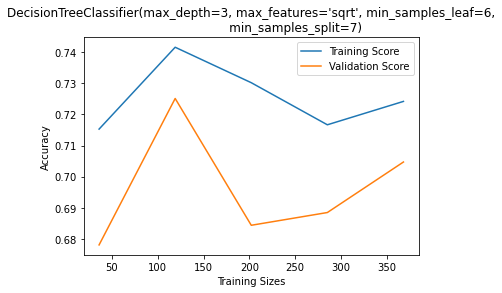

In [152]:
learn_curve(tree_clf_new, X_train, y_train)